In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os #file I/O

import matplotlib.pyplot as plt #used for plotting and analyzing data

# tensorflow
!pip install -U tensorflow==2.8
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.keras import layers
!pip install split-folders
import splitfolders
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.5/497.5 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.4
    Uninstalling tensorflow-2.6.4:
      Successfully uninstalled tensorflow-2.6.4
ERROR: pip's dependency resolver 

2022-07-09 20:01:42.154923: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-07-09 20:01:42.154979: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
splitfolders.ratio('../input/brain-tumor-mri-dataset/Training', output="output", seed=1345, ratio=(.8, 0.1,0.1)) 
IMG_HEIGHT = 130
IMG_WIDTH = 130
train_data = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

class_names = train_data.class_names
print(class_names)
train_data

Copying files: 5712 files [00:31, 181.43 files/s]


Found 4568 files belonging to 4 classes.
Found 575 files belonging to 4 classes.


2022-07-09 20:02:30.428372: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-07-09 20:02:30.428430: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-09 20:02:30.428459: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (765abd10dc5b): /proc/driver/nvidia/version does not exist
2022-07-09 20:02:30.428918: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the

Found 569 files belonging to 4 classes.
['glioma', 'meningioma', 'notumor', 'pituitary']


<BatchDataset element_spec=(TensorSpec(shape=(None, 130, 130, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

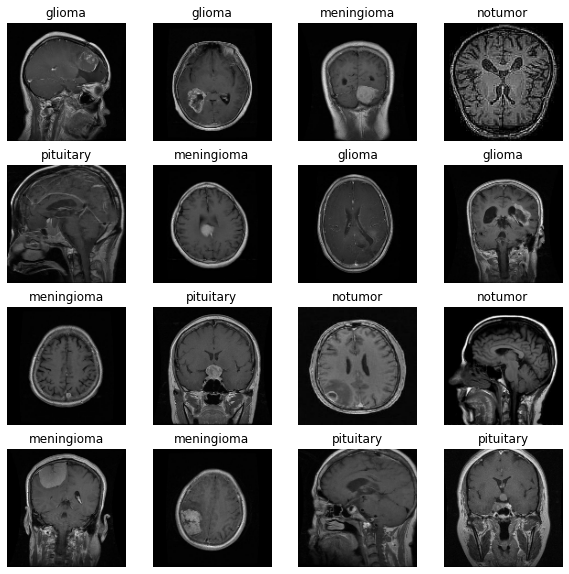

In [3]:
class_names = train_data.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

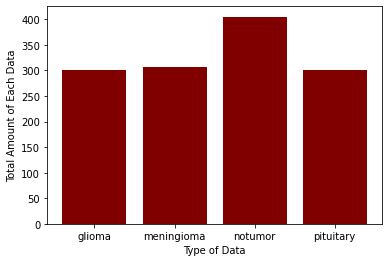

In [4]:
fig = plt.figure()
total_class = ([300, 306, 405, 300])
plt.bar(class_names, total_class, color ='maroon')
plt.xlabel('Type of Data')
plt.ylabel('Total Amount of Each Data')
plt.show()

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 130, 130, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 130, 130, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 65, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])
history = model.fit(train_data,validation_data=val_data,epochs=15, batch_size=64, verbose=1)


Epoch 1/15
72/72 [==============================] - 46s 619ms/step - loss: 0.8675 - accuracy: 0.6250 - val_loss: 0.5508 - val_accuracy: 0.8155
Epoch 2/15
72/72 [==============================] - 44s 602ms/step - loss: 0.4710 - accuracy: 0.8209 - val_loss: 0.4035 - val_accuracy: 0.8471
Epoch 3/15
72/72 [==============================] - 43s 593ms/step - loss: 0.3457 - accuracy: 0.8761 - val_loss: 0.3306 - val_accuracy: 0.8770
Epoch 4/15
72/72 [==============================] - 44s 601ms/step - loss: 0.2699 - accuracy: 0.8984 - val_loss: 0.2783 - val_accuracy: 0.8858
Epoch 5/15
72/72 [==============================] - 44s 602ms/step - loss: 0.2057 - accuracy: 0.9227 - val_loss: 0.2681 - val_accuracy: 0.9033
Epoch 6/15
72/72 [==============================] - 43s 597ms/step - loss: 0.1524 - accuracy: 0.9442 - val_loss: 0.2733 - val_accuracy: 0.9051
Epoch 7/15
72/72 [==============================] - 43s 589ms/step - loss: 0.1314 - accuracy: 0.9534 - val_loss: 0.2059 - val_accuracy: 0.9332

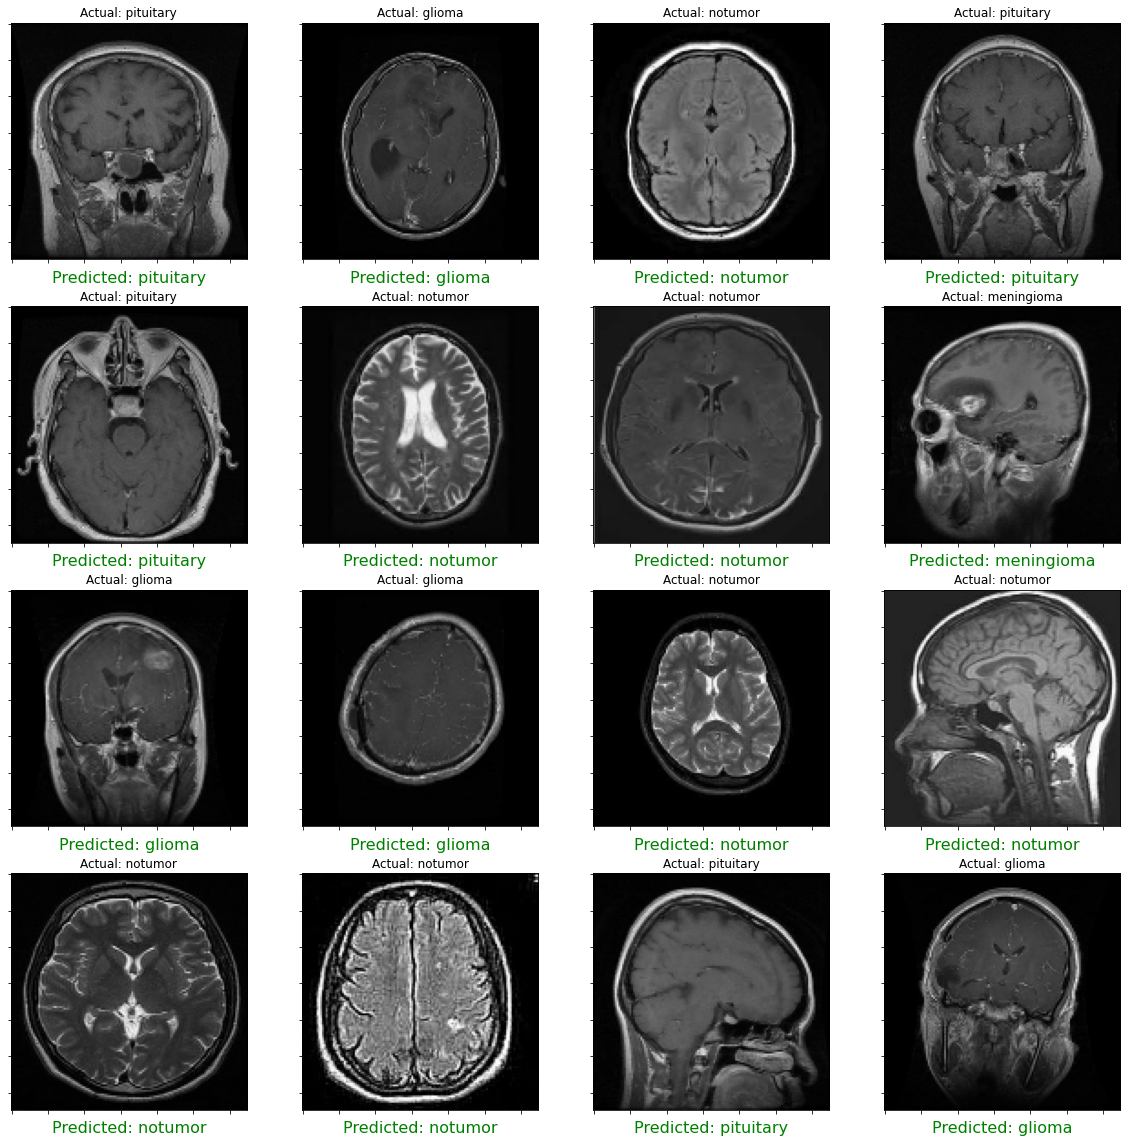

In [7]:
plt.figure(figsize=(20, 20))
for images, labels in test_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+ class_names[labels[i]])
            plt.xlabel("Predicted: "+ class_names[np.argmax(score)],fontsize=16,fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+ class_names[labels[i]])
            plt.xlabel("Predicted: "+ class_names[np.argmax(score)],fontsize=16, fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

<Figure size 432x288 with 0 Axes>

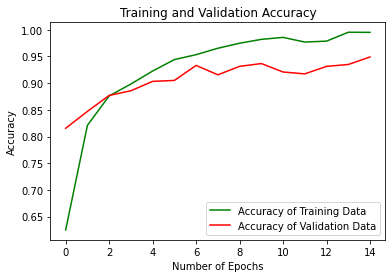

<Figure size 432x288 with 0 Axes>

In [8]:
epochs = range(len(history.history['accuracy']))

plt.plot(epochs, history.history['accuracy'], 'g', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Accuracy of Validation Data')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()